### In this notebook, we'll use Cartopy, Matplotlib, and Pandas to visualize station info from the <a href="http://www.nysmesonet.org/">New York State Mesonet</a>, headquartered right here at UAlbany.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cartopy import crs as ccrs
from cartopy import feature as cfeat

In [2]:
# Make graphics appear in the cell in which they are generated
%matplotlib inline

### Create a regional map, centered over NYS, and add in some geographic features.
#### <span style="color: red"><b>Be patient</b></span>: this may take a minute or so to plot, depending on the resolution of the Natural Earth shapefile features you are adding! 

<img src="images/NaturalEarthScales.png" width="800" height="600"/>

<a img="images/NaturalEarthScales.png"></a>

#### For a quick look, let's just choose the coarsest (110,000,000:1) one.

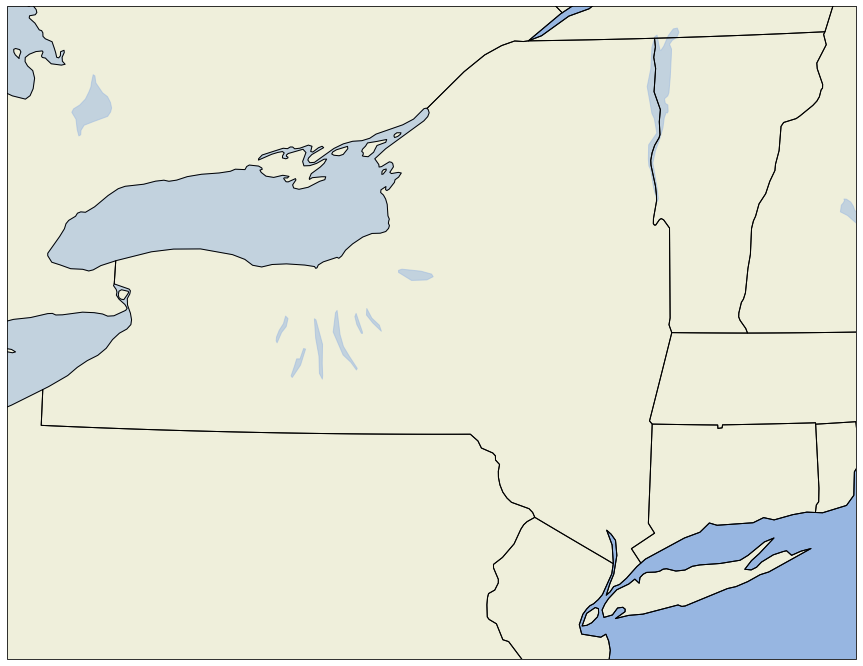

In [36]:
# Set the domain for defining the plot region.
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
res = '50m' # Coarsest and quickest to display; other options are '10m' (slowest) and '50m'.

fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature (cfeat.LAND.with_scale(res))
ax.add_feature (cfeat.OCEAN.with_scale(res))
ax.add_feature(cfeat.COASTLINE.with_scale(res))
ax.add_feature (cfeat.LAKES.with_scale(res), alpha = 0.5)
ax.add_feature (cfeat.STATES.with_scale(res));

### Plot some data on the map. First, let's plot locations of NYS Mesonet sites. We'll use Pandas to read in the file containing the location info.


In [4]:
nysm_sites = pd.read_csv('/spare11/atm533/data/nysm.csv')

### View the first five lines of this `DataFrame`

In [14]:
nysm_sites.head()

,stid,number,name,lat,lon,elevation,county,nearest_city,state,distance_from_town [km],direction_from_town [degrees],climate_division,climate_division_name,wfo,commissioned,decommissioned
0,ADDI,107,Addison,42.04036,-77.23726,507.6140,Steuben,Addison,NY,6.9,S,1,Western Plateau,BGM,2016-08-10 18:15:00 UTC,NaN
1,ANDE,111,Andes,42.18227,-74.80139,518.2820,Delaware,Andes,NY,1.5,WSW,2,Eastern Plateau,BGM,2016-08-04 15:55:00 UTC,NaN
2,BATA,24,Batavia,43.01994,-78.13566,276.1200,Genesee,Batavia,NY,4.9,ENE,9,Great Lakes,BUF,2016-02-18 18:40:00 UTC,NaN
3,BEAC,76,Beacon,41.52875,-73.94527,90.1598,Dutchess,Beacon,NY,3.3,NE,5,Hudson Valley,ALY,2016-08-22 16:45:00 UTC,NaN
4,BELD,90,Belden,42.22322,-75.66852,470.3700,Broome,Belden,NY,2.2,NNE,2,Eastern Plateau,BGM,2015-11-30 20:20:00 UTC,NaN


### Create objects pointing to the three columns of interest.

In [37]:
stid = nysm_sites.stid
lat = nysm_sites.lat
lon = nysm_sites.lon

In [38]:
stid

0      ADDI
1      ANDE
2      BATA
3      BEAC
4      BELD
       ... 
121    WFMB
122    WGAT
123    WHIT
124    WOLC
125    YORK
Name: stid, Length: 126, dtype: object

### Now, make a scatterplot to show the locations of each NYS Mesonet site using Matplotlib's `scatter` method. This method accepts an entire array of lon-lat values.

In [39]:
ax.set_title ('New York State Mesonet Site Locations')
ax.scatter(lon,lat,s=9,c='r',edgecolor='black',alpha=0.75,transform=ccrs.PlateCarree())
#ax.scatter(lon,lat,s=9,c='r',edgecolor='black',alpha=0.75)

### When using the `%matplotlib inline` notebook magic, to get the figure to display again with the features that we've added since the original display, just type the name of the `Figure` object in its own cell.

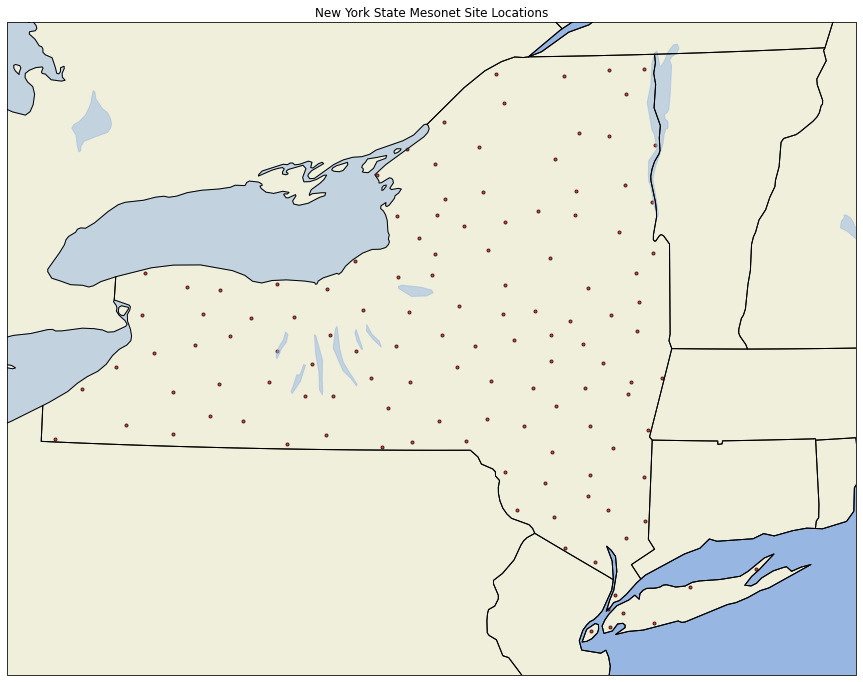

In [40]:
fig

### Next, plot the site IDs, using Matplotlib's `text` method. This method only accepts a single value for its x and y coordinates, so we need to loop over all the values in the arrays.

In [46]:
for count, site in enumerate(stid):
    ax.text(lon[count],lat[count],site,horizontalalignment='right',transform=ccrs.PlateCarree(),fontsize=7)
     #ax.text(lon[count],lat[count],site,horizontalalignment='right',fontsize=7)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


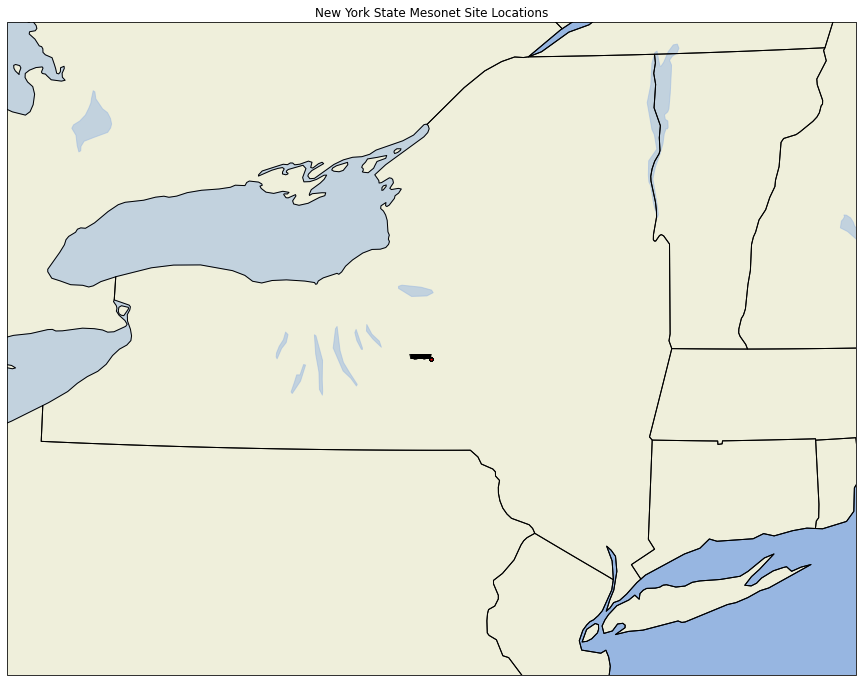

In [34]:
fig

### <span style="color: red"> Did you notice the `transform` argument? </span> Since we are plotting on a Lambert Conformal-projected map, which uses a Cartesian x-y coordinate system where each point is equally separated in meters, we need to convert, or *transform*, the lat-lon coordinates into their equivalent coordinates in our chosen projection. We use the `transform` argument, and assign its value to the coordinate system that our lat-lon array is derived from.

#### <span style="color: green">After you view the resulting plot, go back to the 3rd cell in the notebook and repeat; then reverse what is commented in/out in the follwowing two plotting cells above so as to omit the `transform` argument to `ax.scatter`and `ax.text`.</span> You will see that the site locations are no longer properly plotted.

### <span style="color: green">Also try rerunning the notebook with a higher NaturalEarth feature resolution.</span>

## Next week, as we begin to explore <a href="https://pandas.pydata.org/">Pandas</a> in more detail, we will create a version of this notebook that will display actual measurements from the NYS Mesonet!